<a href="https://www.kaggle.com/code/shravankumar147/01-resume-ranking?scriptVersionId=214394202" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [28]:
# Install required library
!pip install sentence_transformers -q

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [29]:
import re
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt

# Job description for matching
job_description = """Looking for a candidate with expertise in Python, Machine Learning, NLP, and SQL. 
Must have experience in building predictive models and working with large datasets."""

# Sample resumes
resumes = [
    {
        "Name": "John Doe",
        "Education": [
            "- B.Sc. in Computer Science, XYZ University, 2015-2019",
            "- M.Sc. in Data Science, ABC University, 2019-2021"
        ],
        "Skills": ["Python", "Machine Learning", "Deep Learning", "NLP", "SQL"],
        "Experience": [
            "- Data Scientist at DEF Corp (2021-Present)\n  Developed predictive models for customer segmentation.",
            "- Machine Learning Intern at GHI Ltd (2019-2020)\n  Built recommendation systems for e-commerce platforms."
        ]
    },
    {
        "Name": "Jane Smith",
        "Education": [
            "- B.Tech in Information Technology, PQR University, 2014-2018",
            "- Certification in Artificial Intelligence, Online Course, 2020"
        ],
        "Skills": ["Python", "Data Analysis", "SQL", "TensorFlow"],
        "Experience": [
            "- Data Analyst at XYZ Ltd (2018-2021)\n  Analyzed large datasets for business insights.",
            "- Machine Learning Engineer at ABC Tech (2021-Present)\n  Developed models for automated text classification."
        ]
    }
]

In [30]:
# Function Definitions

def normalize_text(data_list):
    """
    Combine a list of text entries into a single normalized text block.
    """
    return " ".join(data_list)

def match_resume_to_job(resume_text, job_description, model):
    """
    Compute similarity between resume text and job description using a sentence-transformer model.
    """
    embeddings = model.encode([resume_text, job_description], convert_to_tensor=True)
    similarity = util.cos_sim(embeddings[0], embeddings[1])
    return similarity.item()

def compute_skill_match(skills, job_description):
    """
    Compute the percentage of skills that match the job description.
    """
    matched_skills = [skill for skill in skills if skill.lower() in job_description.lower()]
    return len(matched_skills) / len(skills) if skills else 0

def rank_candidates(resumes, job_description, model):
    """
    Rank candidates based on similarity scores for skills, education, and experience.
    """
    scores = []

    for resume in resumes:
        # Normalize resume sections
        skills_text = normalize_text(resume["Skills"])
        experience_text = normalize_text(resume["Experience"])
        education_text = normalize_text(resume["Education"])

        # Compute similarity scores
        skill_score = match_resume_to_job(skills_text, job_description, model)
        experience_score = match_resume_to_job(experience_text, job_description, model)
        education_score = match_resume_to_job(education_text, job_description, model)
        keyword_match_score = compute_skill_match(resume["Skills"], job_description)

        # Weighted total score
        total_score = 0.5 * skill_score + 0.4 * experience_score + 0.1 * education_score + 0.1 * keyword_match_score

        # Collect scores
        scores.append({
            "Name": resume["Name"],
            "Skill Score": skill_score,
            "Experience Score": experience_score,
            "Education Score": education_score,
            "Keyword Match Score": keyword_match_score,
            "Total Score": total_score
        })

    return sorted(scores, key=lambda x: x["Total Score"], reverse=True)

def plot_scores(ranked_candidates):
    """
    Visualize the scores of candidates using a bar chart.
    """
    names = [candidate['Name'] for candidate in ranked_candidates]
    skill_scores = [candidate['Skill Score'] for candidate in ranked_candidates]
    experience_scores = [candidate['Experience Score'] for candidate in ranked_candidates]
    education_scores = [candidate['Education Score'] for candidate in ranked_candidates]
    keyword_match_scores = [candidate['Keyword Match Score'] for candidate in ranked_candidates]

    # Plot setup
    bar_width = 0.2
    index = range(len(names))

    # Create bars for each category
    plt.bar(index, skill_scores, bar_width, label="Skills")
    plt.bar([i + bar_width for i in index], experience_scores, bar_width, label="Experience")
    plt.bar([i + 2 * bar_width for i in index], education_scores, bar_width, label="Education")
    plt.bar([i + 3 * bar_width for i in index], keyword_match_scores, bar_width, label="Keyword Match")

    # Configure plot details
    plt.xticks([i + 1.5 * bar_width for i in index], names)
    plt.xlabel("Candidates")
    plt.ylabel("Scores")
    plt.title("Candidate Comparison")
    plt.legend()

    # Show plot
    plt.tight_layout()
    plt.show()

In [31]:
# Load SentenceTransformer model
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

In [32]:
# Rank candidates
ranked_candidates = rank_candidates(resumes, job_description, model)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [33]:
# Display ranked candidates
for candidate in ranked_candidates:
    print(f"Name: {candidate['Name']}, Total Score: {candidate['Total Score']:.2f}")

Name: John Doe, Total Score: 0.62
Name: Jane Smith, Total Score: 0.54


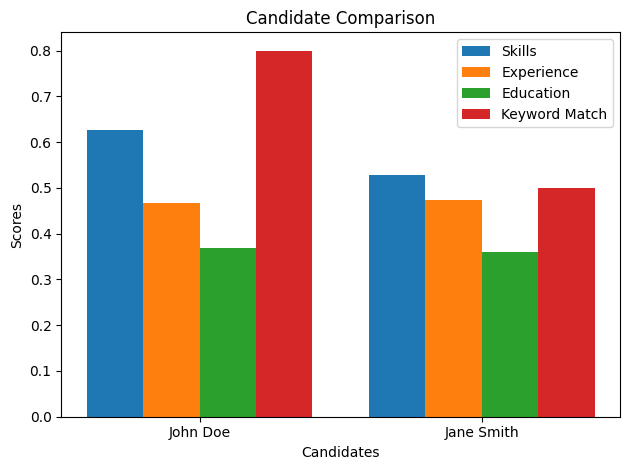

In [34]:
# Plot the scores
plot_scores(ranked_candidates)